In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
plt.style.use (['classic'])

In [2]:
# Read in Revenue Files
file_2007 = "../../datasets/subsets/revenue/rev_2007.csv"

rev_2007 = pd.read_csv(file_2007)
rev_2007 = rev_2007.set_index(['STNAME'])
rev_2007

,2007_R1A,2007_R1B,2007_R1C,2007_R1D,2007_R1E,2007_R1F,2007_R1G,2007_R1H,2007_R1I,2007_R1J,...,2007_R1L,2007_R1M,2007_R1N,2007_R2,2007_R3,2007_R4A,2007_R4B,2007_R4C,2007_R4D,2007_R5
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,NaN,NaN,8.945019e+08,5.300292e+08,4085621.0,5.977000e+05,NaN,51942.0,1.278304e+08,134694732,...,4.145311e+08,1533359.0,NaN,34677523.0,4.070907e+09,17951268.0,680820941,316410.0,21387684.0,1.377693e+09
alaska,NaN,NaN,1.873159e+08,1.842302e+08,336566.0,3.050000e+04,NaN,NaN,1.699412e+07,12056955,...,5.764767e+07,NaN,NaN,NaN,1.146630e+09,55345585.0,128048697,1971027.0,98837475.0,NaN
arizona,2.810552e+09,NaN,NaN,3.905076e+07,834239.0,2.289017e+07,147721.0,280762.0,9.025307e+07,124883913,...,4.174896e+08,960924.0,6072398.0,5475696.0,4.958859e+09,23259559.0,883736844,857130.0,168186040.0,9.502227e+08
arkansas,1.123842e+09,2.745192e+06,NaN,2.045634e+06,7764888.0,2.683091e+06,50728.0,142542.0,6.126704e+07,54812524,...,6.789081e+07,50921.0,391159.0,2190917.0,2.556917e+09,20807521.0,466360538,79835.0,12856682.0,2.668446e+08
california,1.453826e+10,4.848789e+08,1.684000e+05,NaN,208845.0,2.514716e+08,23625969.0,37473985.0,1.502185e+09,571237368,...,2.972148e+09,NaN,NaN,NaN,4.275413e+10,384007024.0,6096830824,18303985.0,211276005.0,9.938490e+09
colorado,2.946346e+09,6.660420e+07,NaN,NaN,51947185.0,4.958860e+06,5314885.0,231392.0,1.610114e+08,97181229,...,3.505252e+08,2772356.0,3481577.0,18719392.0,3.323182e+09,50102084.0,481307391,NaN,10109361.0,1.330160e+09
connecticut,NaN,NaN,4.952897e+09,NaN,3591511.0,1.605311e+08,NaN,10988469.0,1.559310e+06,115646609,...,4.658575e+07,NaN,857491.0,NaN,3.509495e+09,41038101.0,362641894,NaN,16226082.0,8.582874e+08
delaware,3.886803e+08,NaN,NaN,NaN,NaN,6.412324e+07,NaN,NaN,1.661252e+07,17241090,...,5.623515e+07,NaN,NaN,NaN,1.029607e+09,NaN,120499768,NaN,1661484.0,2.359447e+08
district of columbia,NaN,NaN,3.057545e+08,8.139016e+08,527228.0,NaN,133777.0,NaN,5.447500e+04,736526,...,NaN,416443.0,139171.0,NaN,NaN,494836.0,133453262,19824957.0,1246269.0,NaN


In [3]:
(rev_2007.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california    79.784692
texas         51.234563
new york      50.764106
florida       31.643147
illinois      26.798059
dtype: float64

In [4]:
summary_2007 = pd.DataFrame(rev_2007.sum(axis=1)/1000000000, columns=['Total Revenue ($B)'])
summary_2007

,Total Revenue ($B)
STNAME,
alabama,8.478511
alaska,1.896880
arizona,10.611938
arkansas,4.729592
california,79.784692
colorado,9.053340
connecticut,10.080346
delaware,1.931494
district of columbia,1.282317


In [5]:
summary_2007['Local Revenue ($B)'] = rev_2007.iloc[:,0:14].sum(axis=1)/1000000000
summary_2007

,Total Revenue ($B),Local Revenue ($B)
STNAME,,
alabama,8.478511,2.274758
alaska,1.896880,0.466046
arizona,10.611938,3.621340
arkansas,4.729592,1.403535
california,79.784692,20.381658
colorado,9.053340,3.839760
connecticut,10.080346,5.292657
delaware,1.931494,0.543781
district of columbia,1.282317,1.127298


In [6]:
summary_2007['State Revenue ($B)'] = rev_2007.iloc[:,15:16].sum(axis=1)/1000000000


In [7]:
summary_2007['Federal Revenue ($B)'] = rev_2007.iloc[:,16:20].sum(axis=1)/1000000000
summary_2007

,Total Revenue ($B),Local Revenue ($B),State Revenue ($B),Federal Revenue ($B)
STNAME,,,,
alabama,8.478511,2.274758,4.070907,0.720476
alaska,1.896880,0.466046,1.146630,0.284203
arizona,10.611938,3.621340,4.958859,1.076040
arkansas,4.729592,1.403535,2.556917,0.500105
california,79.784692,20.381658,42.754127,6.710418
colorado,9.053340,3.839760,3.323182,0.541519
connecticut,10.080346,5.292657,3.509495,0.419906
delaware,1.931494,0.543781,1.029607,0.122161
district of columbia,1.282317,1.127298,0.000000,0.155019


In [8]:
summary_2007['Other Revenue ($B)'] = (rev_2007.iloc[:,14:15].sum(axis=1) + rev_2007.iloc[:,20:21].sum(axis=1))/1000000000
summary_2007

,Total Revenue ($B),Local Revenue ($B),State Revenue ($B),Federal Revenue ($B),Other Revenue ($B)
STNAME,,,,,
alabama,8.478511,2.274758,4.070907,0.720476,1.412370
alaska,1.896880,0.466046,1.146630,0.284203,0.000000
arizona,10.611938,3.621340,4.958859,1.076040,0.955698
arkansas,4.729592,1.403535,2.556917,0.500105,0.269036
california,79.784692,20.381658,42.754127,6.710418,9.938490
colorado,9.053340,3.839760,3.323182,0.541519,1.348880
connecticut,10.080346,5.292657,3.509495,0.419906,0.858287
delaware,1.931494,0.543781,1.029607,0.122161,0.235945
district of columbia,1.282317,1.127298,0.000000,0.155019,0.000000


In [9]:
summary_pct = pd.DataFrame(summary_2007['Local Revenue ($B)'] / summary_2007['Total Revenue ($B)'] *100, columns = ['Local Rev (%)'])
summary_pct['State Rev (%)'] = summary_2007['State Revenue ($B)'] / summary_2007['Total Revenue ($B)'] *100
summary_pct['Federal Rev (%)'] = summary_2007['Federal Revenue ($B)'] / summary_2007['Total Revenue ($B)'] *100
summary_pct['Other Rev (%)'] = summary_2007['Other Revenue ($B)'] / summary_2007['Total Revenue ($B)'] *100
summary_pct

,Local Rev (%),State Rev (%),Federal Rev (%),Other Rev (%)
STNAME,,,,
alabama,26.829682,48.014408,8.497675,16.658235
alaska,24.569107,60.448245,14.982648,0.000000
arizona,34.125158,46.729065,10.139897,9.005880
arkansas,29.675603,54.062103,10.573948,5.688345
california,25.545825,53.586880,8.410658,12.456638
colorado,42.412631,36.706692,5.981426,14.899250
connecticut,52.504719,34.815225,4.165592,8.514464
delaware,28.153376,53.306264,6.324703,12.215657
district of columbia,87.911001,0.000000,12.088999,0.000000


In [10]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2007.csv"

success_2007 = pd.read_csv(dropout_path)
success_2007

,STNAME,2007_DRP912,2007_DRP9,2007_DRP10,2007_DRP11,2007_DRP12,2007_DRPAM,2007_DRPAS,2007_DRPHI,2007_DRPBL,2007_DRPWH
0,alabama,2.299999,1.900000,2.599998,2.599998,2.500000,1.000000,0.700000,2.500000,2.799999,2.099998
1,alaska,7.299999,4.599998,6.599998,8.699997,9.599998,9.500000,6.699997,9.000000,10.000000,5.199997
2,arizona,7.599998,4.699997,5.699997,7.500000,13.199997,13.199997,4.099998,8.500000,7.899998,6.299999
3,arkansas,4.599998,2.900000,4.000000,5.599998,6.599998,4.500000,2.900000,5.500000,6.500000,4.000000
4,california,5.500000,3.199999,3.500000,4.500000,11.599998,7.699997,2.699999,6.799999,10.000000,3.500000
5,colorado,6.899998,5.399998,6.399998,7.099998,9.199997,12.500000,4.000000,13.799995,10.000000,4.299999
6,connecticut,2.099998,1.900000,2.099998,2.400000,1.900000,3.400000,1.099999,4.699997,3.599998,1.299999
7,delaware,5.500000,6.699997,5.699997,4.500000,4.399998,2.299999,2.299999,8.599998,7.099998,4.399998
8,district of columbia,7.099998,7.699997,7.599998,6.099998,6.500000,NaN,6.099998,11.000000,6.899998,1.599999
9,florida,3.799999,3.500000,3.699999,3.900000,4.399998,3.099998,1.799999,4.500000,5.799999,2.699999


In [11]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_pct['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Local Rev (%),State Rev (%),Federal Rev (%),Other Rev (%),Dropout Rate
STNAME,,,,,
alabama,26.829682,48.014408,8.497675,16.658235,2.3
alaska,24.569107,60.448245,14.982648,0.000000,7.3
arizona,34.125158,46.729065,10.139897,9.005880,7.6
arkansas,29.675603,54.062103,10.573948,5.688345,4.6
california,25.545825,53.586880,8.410658,12.456638,5.5
colorado,42.412631,36.706692,5.981426,14.899250,6.9
connecticut,52.504719,34.815225,4.165592,8.514464,2.1
delaware,28.153376,53.306264,6.324703,12.215657,5.5
district of columbia,87.911001,0.000000,12.088999,0.000000,7.1


In [12]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Local Rev (%),State Rev (%),Federal Rev (%),Other Rev (%),Dropout Rate
STNAME,,,,,
arizona,34.125158,46.729065,10.139897,9.005880,7.6
louisiana,35.490201,37.637929,15.248897,11.622974,7.4
michigan,30.414047,52.572932,7.216952,9.796069,7.4
alaska,24.569107,60.448245,14.982648,0.000000,7.3
district of columbia,87.911001,0.000000,12.088999,0.000000,7.1
colorado,42.412631,36.706692,5.981426,14.899250,6.9
new mexico,13.477130,67.414187,13.159989,5.948694,6.1
rhode island,47.540909,36.539146,7.324426,8.595518,5.8
north carolina,24.632622,58.930157,9.264929,7.172291,5.7


In [13]:
summary_2007['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_2007['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    
summary_2007 = summary_2007[summary_2007['Dropout Rate'].notna()]
summary_2007['Dropout Rate'] = summary_2007['Dropout Rate'].astype(float)
summary_2007.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, alabama to wyoming
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total Revenue ($B)    49 non-null     float64
 1   Local Revenue ($B)    49 non-null     float64
 2   State Revenue ($B)    49 non-null     float64
 3   Federal Revenue ($B)  49 non-null     float64
 4   Other Revenue ($B)    49 non-null     float64
 5   Dropout Rate          49 non-null     float64
dtypes: float64(6)
memory usage: 2.7+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


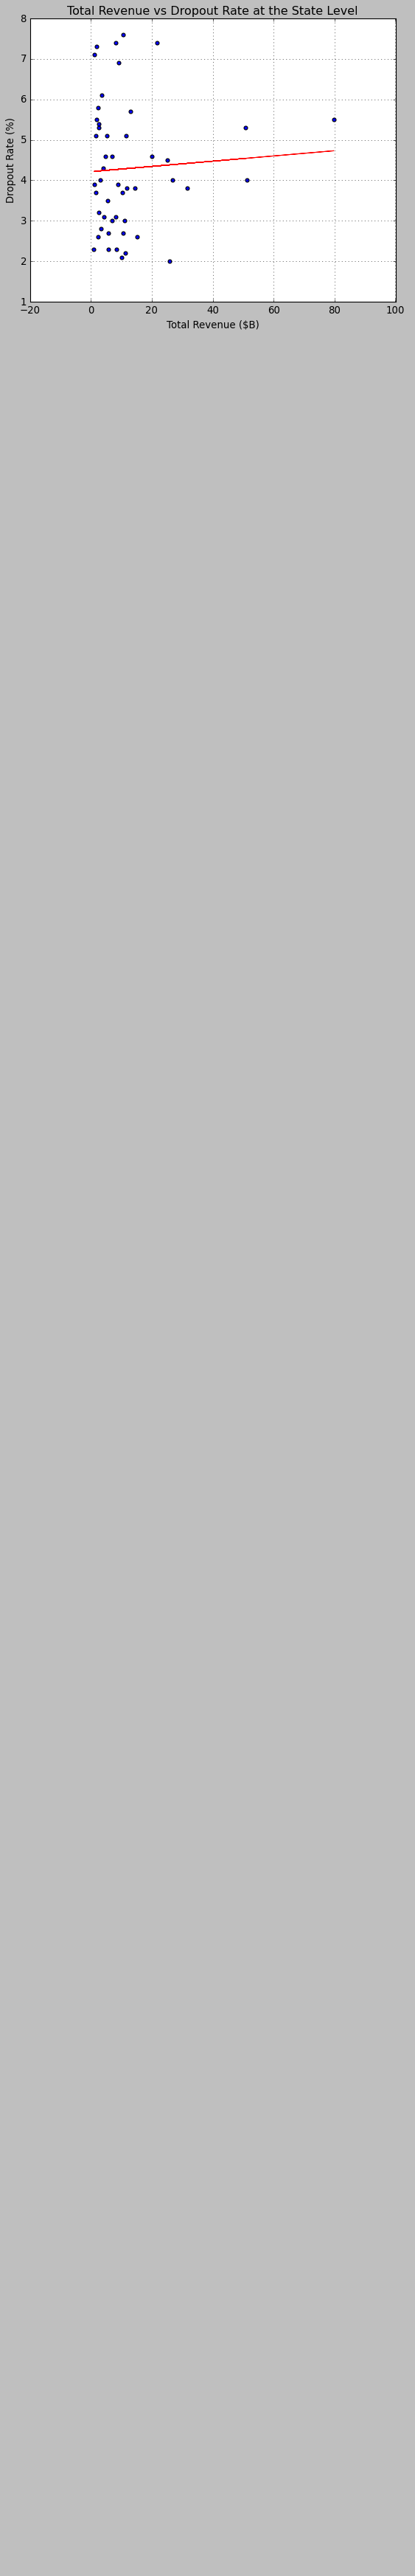

The correlation between both factors is 0.0612


In [14]:
# Total Revenue v Dropout

x_values = summary_2007['Total Revenue ($B)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-55),fontsize=15,color="red")
plt.xlabel('Total Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Revenue vs Dropout Rate at the State Level')
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

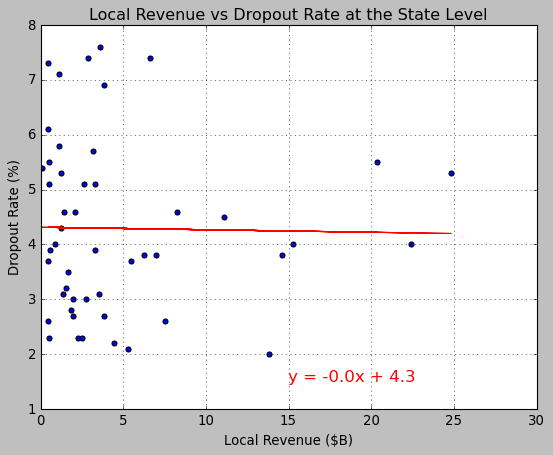

The correlation between both factors is -0.0171


In [15]:
# Local Revenue vs Dropout Rate
x_values = summary_2007['Local Revenue ($B)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,1.5),fontsize=15,color="red")
plt.xlabel('Local Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('Local Revenue vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 30)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

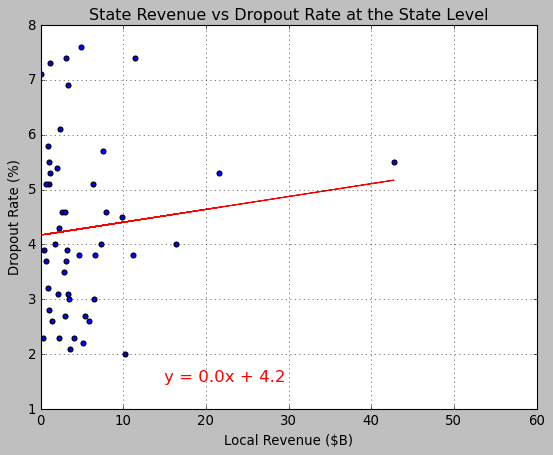

The correlation between both factors is 0.103


In [16]:
# State Revenue vs Dropout Rate
x_values = summary_2007['State Revenue ($B)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,1.5),fontsize=15,color="red")
plt.xlabel('Local Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('State Revenue vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 60)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

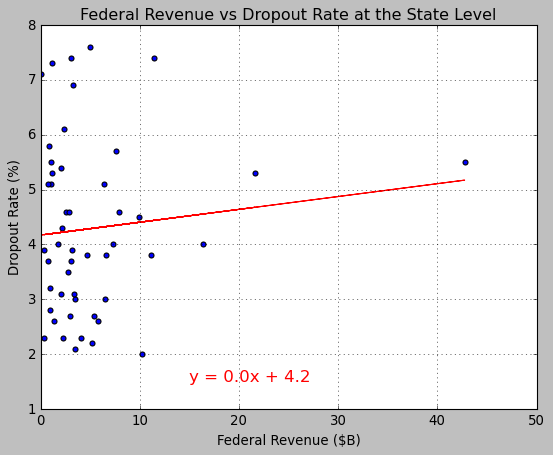

The correlation between both factors is 0.103


In [17]:
# Federal Revenue vs Dropout Rate
x_values = summary_2007['State Revenue ($B)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,1.5),fontsize=15,color="red")
plt.xlabel('Federal Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('Federal Revenue vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 50)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

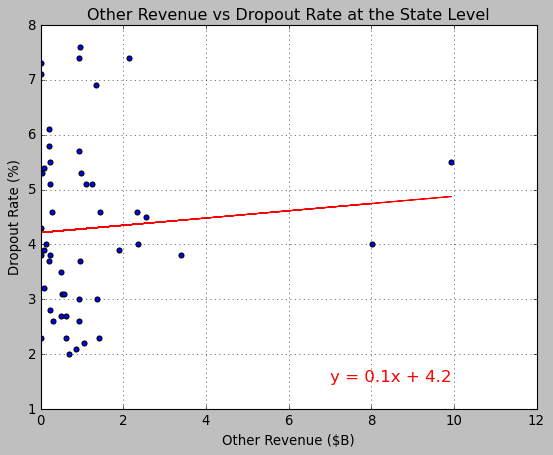

The correlation between both factors is 0.0762


In [18]:
# Other Revenue vs Dropout Rate
x_values = summary_2007['Other Revenue ($B)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,1.5),fontsize=15,color="red")
plt.xlabel('Other Revenue ($B)')
plt.ylabel('Dropout Rate (%)')
plt.title('Other Revenue vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 12)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

In [19]:
summary_pct

,Local Rev (%),State Rev (%),Federal Rev (%),Other Rev (%),Dropout Rate
STNAME,,,,,
alabama,26.829682,48.014408,8.497675,16.658235,2.3
alaska,24.569107,60.448245,14.982648,0.000000,7.3
arizona,34.125158,46.729065,10.139897,9.005880,7.6
arkansas,29.675603,54.062103,10.573948,5.688345,4.6
california,25.545825,53.586880,8.410658,12.456638,5.5
colorado,42.412631,36.706692,5.981426,14.899250,6.9
connecticut,52.504719,34.815225,4.165592,8.514464,2.1
delaware,28.153376,53.306264,6.324703,12.215657,5.5
district of columbia,87.911001,0.000000,12.088999,0.000000,7.1


In [20]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_pct['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    
summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, alabama to wyoming
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Local Rev (%)    49 non-null     float64
 1   State Rev (%)    49 non-null     float64
 2   Federal Rev (%)  49 non-null     float64
 3   Other Rev (%)    49 non-null     float64
 4   Dropout Rate     49 non-null     float64
dtypes: float64(5)
memory usage: 2.3+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [21]:
summary_pct

,Local Rev (%),State Rev (%),Federal Rev (%),Other Rev (%),Dropout Rate
STNAME,,,,,
alabama,26.829682,48.014408,8.497675,16.658235,2.299999
alaska,24.569107,60.448245,14.982648,0.000000,7.299999
arizona,34.125158,46.729065,10.139897,9.005880,7.599998
arkansas,29.675603,54.062103,10.573948,5.688345,4.599998
california,25.545825,53.586880,8.410658,12.456638,5.500000
colorado,42.412631,36.706692,5.981426,14.899250,6.899998
connecticut,52.504719,34.815225,4.165592,8.514464,2.099998
delaware,28.153376,53.306264,6.324703,12.215657,5.500000
district of columbia,87.911001,0.000000,12.088999,0.000000,7.099998


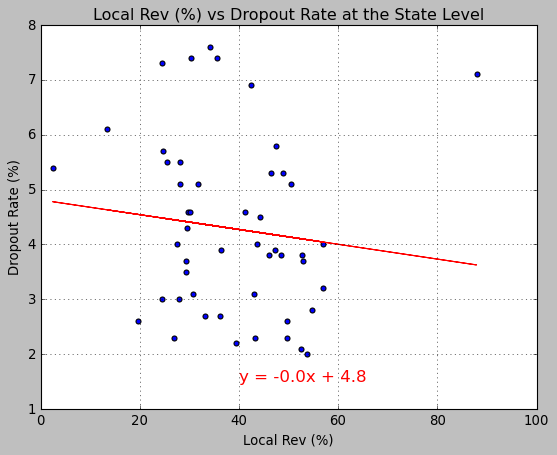

The correlation between both factors is -0.1203


In [22]:
# Other Revenue vs Dropout Rate
x_values = summary_pct['Local Rev (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Local Rev (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Local Rev (%) vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")


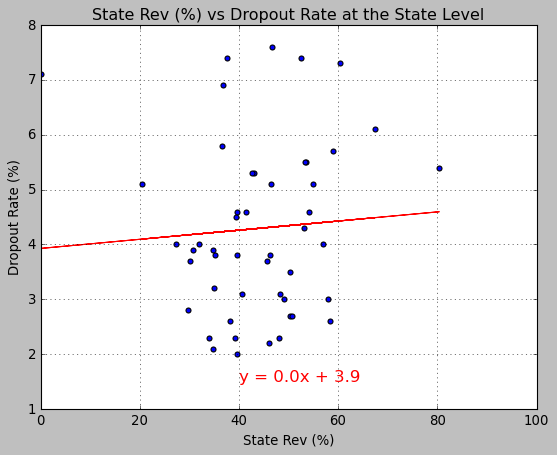

The correlation between both factors is 0.0678


In [23]:
# Local Rev (%) vs Dropout Rate
x_values = summary_pct['State Rev (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('State Rev (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('State Rev (%) vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

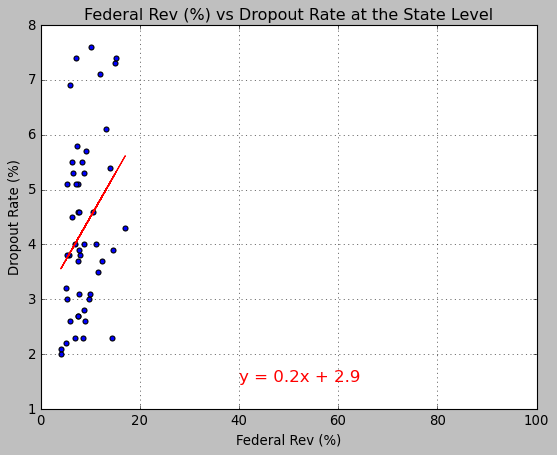

The correlation between both factors is 0.3179


In [24]:
# Federal Rev (%) vs Dropout Rate
x_values = summary_pct['Federal Rev (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Federal Rev (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Federal Rev (%) vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

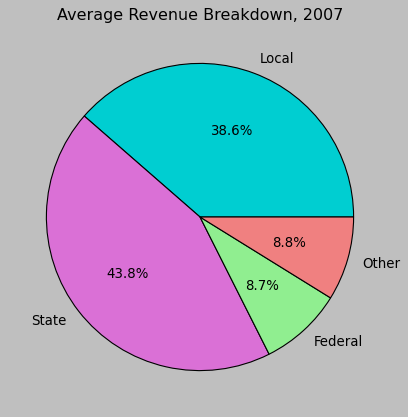

In [26]:
local = summary_pct['Local Rev (%)'].mean()
state = summary_pct['State Rev (%)'].mean()
federal = summary_pct['Federal Rev (%)'].mean()
other = summary_pct['Other Rev (%)'].mean()

plt.pie(x = [local, state, federal, other], labels = ['Local', 'State', 'Federal', 'Other'],
        autopct='%1.1f%%', colors = ['darkturquoise', 'orchid', 'lightgreen', 'lightcoral'])
plt.title('Average Revenue Breakdown, 2007')
plt.show()